# Sensitivity Analysis with SALib

I would like to give it another try to this library. This time, I will generate the output and then approximate given the values we gave to each scenario (considering three variables)

In [1]:
from SALib.sample import saltelli
from SALib.analyze import sobol,ff
from SALib.test_functions import Ishigami
import numpy as np
import random
import itertools
import pandas as pd

import os
from os import listdir
from os.path import isfile,join
import matplotlib.pyplot as plt

In [2]:
PATH = '/home/moni/Documents/motmo/timeSeries_files/' # original data
PATH2 = '/home/moni/Documents/motmo/data_without_hhID/' # folder in which we will store transformed data

In [3]:
s3 = list(itertools.product(range(2), repeat=3))
s4 = list(itertools.product(range(2), repeat=4))
l1 = [i for i in s3 if sum(i)<3]
l2 = l1
l3 = [i for i in s4 if sum(i)<3]
L=[]
L.append(l1)
L.append(l2)
L.append(l3)
bin_inputs = list(itertools.product(*L)) # here we have the 539 scenarios

In [4]:
bin_inputs

[((0, 0, 0), (0, 0, 0), (0, 0, 0, 0)),
 ((0, 0, 0), (0, 0, 0), (0, 0, 0, 1)),
 ((0, 0, 0), (0, 0, 0), (0, 0, 1, 0)),
 ((0, 0, 0), (0, 0, 0), (0, 0, 1, 1)),
 ((0, 0, 0), (0, 0, 0), (0, 1, 0, 0)),
 ((0, 0, 0), (0, 0, 0), (0, 1, 0, 1)),
 ((0, 0, 0), (0, 0, 0), (0, 1, 1, 0)),
 ((0, 0, 0), (0, 0, 0), (1, 0, 0, 0)),
 ((0, 0, 0), (0, 0, 0), (1, 0, 0, 1)),
 ((0, 0, 0), (0, 0, 0), (1, 0, 1, 0)),
 ((0, 0, 0), (0, 0, 0), (1, 1, 0, 0)),
 ((0, 0, 0), (0, 0, 1), (0, 0, 0, 0)),
 ((0, 0, 0), (0, 0, 1), (0, 0, 0, 1)),
 ((0, 0, 0), (0, 0, 1), (0, 0, 1, 0)),
 ((0, 0, 0), (0, 0, 1), (0, 0, 1, 1)),
 ((0, 0, 0), (0, 0, 1), (0, 1, 0, 0)),
 ((0, 0, 0), (0, 0, 1), (0, 1, 0, 1)),
 ((0, 0, 0), (0, 0, 1), (0, 1, 1, 0)),
 ((0, 0, 0), (0, 0, 1), (1, 0, 0, 0)),
 ((0, 0, 0), (0, 0, 1), (1, 0, 0, 1)),
 ((0, 0, 0), (0, 0, 1), (1, 0, 1, 0)),
 ((0, 0, 0), (0, 0, 1), (1, 1, 0, 0)),
 ((0, 0, 0), (0, 1, 0), (0, 0, 0, 0)),
 ((0, 0, 0), (0, 1, 0), (0, 0, 0, 1)),
 ((0, 0, 0), (0, 1, 0), (0, 0, 1, 0)),
 ((0, 0, 0), (0, 1, 0), (

### From binary to base 10

In [4]:
# step = 1/6
I = list(range(0,7,1))
I = [i/6 for i in I]
P = I
E = list(range(0,11,1))
E = [i/10 for i in E]
E

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [5]:
dict_I = dict(zip(l1,I))
dict_P = dict_I
dict_E = dict(zip(l3,E))
dict_E

{(0, 0, 0, 0): 0.0,
 (0, 0, 0, 1): 0.1,
 (0, 0, 1, 0): 0.2,
 (0, 0, 1, 1): 0.3,
 (0, 1, 0, 0): 0.4,
 (0, 1, 0, 1): 0.5,
 (0, 1, 1, 0): 0.6,
 (1, 0, 0, 0): 0.7,
 (1, 0, 0, 1): 0.8,
 (1, 0, 1, 0): 0.9,
 (1, 1, 0, 0): 1.0}

In [6]:
inputs = []
k=0
for i in bin_inputs:
    t = [dict_I[i[0]], dict_P[i[1]], dict_E[i[2]]]
    inputs.append(t)
#inputs

In [7]:
X = np.array(inputs)
X

array([[0. , 0. , 0. ],
       [0. , 0. , 0.1],
       [0. , 0. , 0.2],
       ...,
       [1. , 1. , 0.8],
       [1. , 1. , 0.9],
       [1. , 1. , 1. ]])

In [8]:
te_df = pd.read_csv("total_emissions.csv") # global variable

In [9]:
problem = {
    'num_vars': 3,
    'names': ['I', 'P', 'E'],
    'bounds': [[0, 1],
               [0, 1],
               [0, 1]]
}

In [10]:
sample_0 = saltelli.sample(problem,64) # N has to be apower of 2
sample_0

array([[0.0234375, 0.3984375, 0.8203125],
       [0.8359375, 0.3984375, 0.8203125],
       [0.0234375, 0.6484375, 0.8203125],
       ...,
       [0.6328125, 0.6640625, 0.3359375],
       [0.6328125, 0.4765625, 0.5546875],
       [0.6328125, 0.4765625, 0.3359375]])

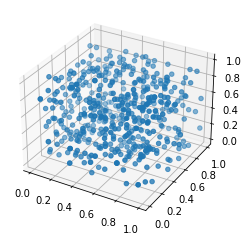

In [23]:
x = sample_0[:,0]
y = sample_0[:,1]
z = sample_0[:,2]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)

In [25]:
# this function takes as input one real value 
# taken from the satelli sample and the desired variable ('variable' can be 'I', 'P' or 'E')
def round_sample_value(value, variable): 
    if variable == 'I' or variable == 'P':
        out = round(6*value)/6
        return out
    elif variable=='E':
        out= round(10*value)/10
        return out
    else:
        print('ERROR IN YOUR INPUT! Make sure the variable is either "I", "P" or "E" (as a string)')
    

In [26]:
def approx_satelli_sample(satelli_sample):
    sample = satelli_sample
    with np.nditer(sample, op_flags=['readwrite']) as it:
        for x in it:
            print(x)

In [27]:
sam_test = sample_0
with np.nditer(sam_test[:,0], op_flags=['readwrite']) as it:
    for x in it:
        x[...] = round_sample_value(x,'I')
with np.nditer(sam_test[:,1], op_flags=['readwrite']) as it:
    for x in it:
        x[...] = round_sample_value(x,'P')
with np.nditer(sam_test[:,2], op_flags=['readwrite']) as it:
    for x in it:
        x[...] = round_sample_value(x,'E')

In [28]:
sam_test

array([[0.        , 0.33333333, 0.8       ],
       [0.83333333, 0.33333333, 0.8       ],
       [0.        , 0.66666667, 0.8       ],
       ...,
       [0.66666667, 0.66666667, 0.3       ],
       [0.66666667, 0.5       , 0.6       ],
       [0.66666667, 0.5       , 0.3       ]])

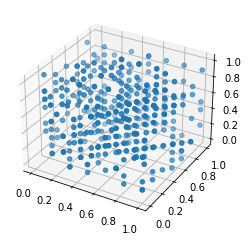

In [29]:
x = sam_test[:,0]
y = sam_test[:,1]
z = sam_test[:,2]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)

In [163]:
test_list = sam_test.astype(float).tolist()
# dups = {tuple(x) for x in test_list if test_list.count(x)>1}
# len(dups)

In [160]:
# Si = sobol.analyze(problem, Y)
def invert_dict(d_X):
    dI_X = {v: k for k, v in d_X.items()}
    return dI_X
d_I = invert_dict(dict_I)
d_P = invert_dict(dict_P)
d_E = invert_dict(dict_E)
def from_dec_to_bool(row):
    rbool = [d_I[row[0]], d_P[row[1]], d_E[row[2]]]
    return rbool
def get_scenario_string(boolean_scenario): 
    bool_sc = list(sum(boolean_scenario,())) # flatten list
    dict2_I = dict(zip(I,l1))
    dict2_P = dict_I
    dict2_E = dict(zip(E,l3))
    #dict_E
    list_events = ['CH','SP','SE','WE','BP','RE','CO','DI','WO','CS']
    # prefix = "timeSeries_"
    # sufix = ".csv"
    f_n = [l+str(s) for l,s in zip(list_events,bool_sc)]
    f_n = ''.join(f_n)
    file_name = f_n
    return file_name

In [166]:
def get_output(M):#input is a matrix M, make sure it is a list
    out_vector = []
    n = len(M)
    for i in range(0,n):
        dec_row = M[i]
        row_bool = from_dec_to_bool(dec_row)
        string = get_scenario_string(row_bool)
        cond = (te_df['scenario'] == string)
        # print(cond)
        outp = te_df[cond].total_emissions.values[0]
        out_vector.append(outp)
    return out_vector

In [181]:
Y = np.array(get_output(test_list))
Si = sobol.analyze(problem, Y)
print(Si)

{'S1': array([-0.00649724,  1.0047024 ,  0.05335474]), 'S1_conf': array([0.02554122, 0.23877076, 0.07167761]), 'ST': array([0.00653162, 0.98061737, 0.05342373]), 'ST_conf': array([0.00296704, 0.22284438, 0.01581721]), 'S2': array([[        nan,  0.00782893,  0.01337876],
       [        nan,         nan, -0.00833939],
       [        nan,         nan,         nan]]), 'S2_conf': array([[       nan, 0.04227663, 0.02934758],
       [       nan,        nan, 0.19189939],
       [       nan,        nan,        nan]])}


In [186]:
print("x1-x2:", Si['S2'][0,1])
print("x1-x3:", Si['S2'][0,2])
print("x2-x3:", Si['S2'][1,2])

x1-x2: 0.007828925288694055
x1-x3: 0.013378761860850227
x2-x3: -0.008339390224192056


In [187]:
total_Si, first_Si, second_Si = Si.to_df()

In [200]:
first_Si

,S1,S1_conf
I,-0.006497,0.025541
P,1.004702,0.238771
E,0.053355,0.071678


In [201]:
total_Si

,ST,ST_conf
I,0.006532,0.002967
P,0.980617,0.222844
E,0.053424,0.015817


In [202]:
second_Si

,S2,S2_conf
"(I, P)",0.007829,0.042277
"(I, E)",0.013379,0.029348
"(P, E)",-0.008339,0.191899
